## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
#I USED CHATGTP TO REFINE THE GIVEN CODE (from profressor) AND SUPPORT READABILITY

# Define variables
var_list = ['year','wrkstat', 'educ', 'income', 'age', 'polviews', 'childs', 'maeduc', 'paeduc']
output_filename = 'selected_gss_data.csv'
chunk_urls = [f'https://github.com/DS3001/project_gss/raw/main/gss_chunk_{i}.parquet' for i in range(1, 4)]  # URLs for 3 chunks

# Process and save data
for i, url in enumerate(chunk_urls):
    print(f"Processing: {url}")
    df = pd.read_parquet(url)  # Load data
    df = df[var_list]  # Keep only selected columns
    print(df.head())  # Preview first rows

    mode = 'w' if i == 0 else 'a'  # Write for first chunk, append for others
    header = True if i == 0 else False  # Keep header only for first chunk

    df.to_csv(output_filename, mode=mode, header=header, index=False)

print(f"Data is in  {output_filename}")


Processing: https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year            wrkstat  educ income   age polviews  childs  maeduc  paeduc
0  1972  working full time  16.0    NaN  23.0      NaN     0.0     NaN    10.0
1  1972            retired  10.0    NaN  70.0      NaN     5.0     8.0     8.0
2  1972  working part time  12.0    NaN  48.0      NaN     4.0     8.0     8.0
3  1972  working full time  17.0    NaN  27.0      NaN     0.0    12.0    16.0
4  1972      keeping house  12.0    NaN  61.0      NaN     2.0     8.0     8.0
Processing: https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet
   year            wrkstat  educ            income   age  \
0  1989            retired  14.0  $5,000 to $5,999  62.0   
1  1989  working full time  14.0  $3,000 to $3,999  32.0   
2  1989            retired  12.0  $7,000 to $7,999  80.0   
3  1989  working full time  10.0               NaN  19.0   
4  1989            retired   6.0  $6,000 to $6,999  67.0   

       

In [85]:
# Cleaning data
df = pd.read_csv('selected_gss_data.csv')
df.head()

,year,wrkstat,educ,income,age,polviews,childs,maeduc,paeduc
0,1972,working full time,16.0,NaN,23.0,NaN,0.0,NaN,10.0
1,1972,retired,10.0,NaN,70.0,NaN,5.0,8.0,8.0
2,1972,working part time,12.0,NaN,48.0,NaN,4.0,8.0,8.0
3,1972,working full time,17.0,NaN,27.0,NaN,0.0,12.0,16.0
4,1972,keeping house,12.0,NaN,61.0,NaN,2.0,8.0,8.0


In [86]:
missing_proportion = df.isnull().sum() / len(df) * 100  # Calculate percentage
for col, perc in missing_proportion.items():
    print(f"{col}: {perc:.2f}% missing")

year: 0.00% missing
wrkstat: 0.05% missing
educ: 0.36% missing
income: 12.36% missing
age: 1.06% missing
polviews: 13.36% missing
childs: 0.36% missing
maeduc: 16.28% missing
paeduc: 28.82% missing


In [87]:
# checking the distribution and unique values
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n" + "="*40 + "\n")

Value counts for year:
year
2006    4510
2021    4032
2022    3544
1994    2992
1996    2904
2016    2867
1998    2832
2000    2817
2004    2812
2002    2765
2014    2538
2018    2348
2010    2044
2008    2023
2012    1974
1982    1860
1987    1819
1972    1613
1993    1606
1983    1599
1989    1537
1985    1534
1978    1532
1977    1530
1991    1517
1973    1504
1976    1499
1975    1490
1974    1484
1988    1481
1984    1473
1986    1470
1980    1468
1990    1372
Name: count, dtype: int64


Value counts for wrkstat:
wrkstat
working full time                                                             35267
retired                                                                       10886
keeping house                                                                 10764
working part time                                                              7430
unemployed, laid off, looking for work                                         2621
in school                                       

In [90]:
# Data Cleaning
df.columns= df.columns.str.lower()
# making all the column names lowercase
# making all the values with empty strings into NAN so we can drop those
df.replace(r'^\s*$', np.nan, regex=True, inplace=True) # this sets values of NAN if some values have spaces
df.dropna(subset=['wrkstat', 'educ', 'age', 'childs'], inplace=True) # this drops all null/nan values from the three columns listed
df['income'] = pd.to_numeric(df['income'], errors='coerce') # this converts the income values into numeric ( so we can perform missing value imputations)
df['income'].fillna(df['income'].median(), inplace=True) # this replaces the missing values into the median values from income
df['maeduc'].fillna(df['maeduc'].median(), inplace=True) # this replaces the missing values into median values ( trying to avoid mass deleting missing information)
df['polviews'].fillna(df['polviews'].mode()[0], inplace=True) # this replaces the missing polviews with the most frequenct answer
df['paeduc'].fillna(df['paeduc'].mode()[0], inplace=True) # this replaces the missing values with the most common/frequnet value ( avoiding mass deleting)

<ipython-input-90-772b7d52d17e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].median(), inplace=True)
<ipython-input-90-772b7d52d17e>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [89]:
df.isnull().sum() # checking if we removed the null values ( they are removed)

,0
year,0
wrkstat,0
educ,0
income,0
age,0
polviews,0
childs,0
maeduc,0
paeduc,0


In [92]:
df['income'].value_counts() # checking on the income

,count
income,
25.0,42828
10.0,6788
20.0,5482
15.0,5264
1.0,2278
8.0,2269
7.0,1305
5.0,1299
3.0,1290


WE NEED TO START MAPPING THE DIFFERENT CATEGORIES INTO CONCISE GROUPINGS

In [96]:
# Maping the income ranges back again
income_renamed = {
    25.0: "25K+",
    10.0: "$10K to $14K",
    20.0: "$20K to $24K",
    15.0: "$15K to $19K",
    8.0: "$8K to $9K",
    1.0: "$1K to $2.9K",
    7.0: "$7K to $7.9K",
    5.0: "$5K to $5.9K",
    3.0: "$3K to $3.9K",
    6.0: "$6K to $6.9K",
    4.0: "$4K to $4.9K",
    1.0: "under $1K"
}

df['income'] = df['income'].map(income_renamed)

In [105]:
#Update the categories for 'paeduc' (Parent Education)
school_map = {
    0: 'No Schooling',
    1: 'Elementary School',
    2: 'Elementary School',
    3: 'Elementary School',
    4: 'Elementary School',
    5: 'Elementary School',
    6: 'Elementary School',
    7: 'Middle School',
    8: 'Middle School',
    9: 'High School',
    10: 'High School',
    11: 'High School',
    12: 'High School',
    13: "Bachelor's Degree",
    14: "Bachelor's Degree",
    15: "Bachelor's Degree",
    16: "Bachelor's Degree",
    17: 'Advanced Degree',
    18: 'Advanced Degree',
    19: 'Advanced Degree',
    20: 'Advanced Degree'
}

# Update the workstats categories into shorter more defined categoires names
wrkstat_map = {
    'working full time': 'Full-Time',
    'retired': 'Retired',
    'keeping house': 'Keeping House',
    'working part time': 'Part-Time',
    'unemployed, laid off, looking for work': 'Unemployed',
    'in school': 'In School',
    'other': 'Other',
    'with a job, but not at work because of temporary illness, vacation, strike': 'Temporary Off'
}

#Mapping the (Political Views) into broader categories
polviews_map = {
    'moderate, middle of the road': 'Moderate',
    'slightly conservative': 'Slightly Conservative',
    'conservative': 'Conservative',
    'slightly liberal': 'Slightly Liberal',
    'liberal': 'Liberal',
    'extremely conservative': 'Extremely Conservative',
    'extremely liberal': 'Extremely Liberal'
}

#Replacing the mapped dictionary values - adding the filterd values to the dataframe
df['paeduc'] = df['paeduc'].replace(school_map)
df['maeduc'] = df['maeduc'].replace(school_map)
df['educ'] = df['educ'].replace(school_map)
df['wrkstat'] = df['wrkstat'].replace(wrkstat_map)
df['polviews'] = df['polviews'].replace(polviews_map)


SUMMARY STATS AND VISULIZATIONS

In [106]:
df.describe() # this will only show the statistics for continous variables

,year,age,childs
count,71220.000000,71220.000000,71220.000000
mean,1997.549719,46.546223,1.917551
std,15.020093,17.588964,1.759257
min,1972.000000,18.000000,0.000000
25%,1985.000000,32.000000,0.000000
50%,1998.000000,44.000000,2.000000
75%,2010.000000,60.000000,3.000000
max,2022.000000,89.000000,8.000000


In [107]:
# checking data type
df.dtypes

,0
year,int64
wrkstat,object
educ,object
income,object
age,float64
polviews,object
childs,float64
maeduc,object
paeduc,object


Looks like the Year range is from 1972-2022, the mean respondents had age of 46 and the minimum age of 18. The max number of childs a respondent answerd was 8 and min was 0 (having no kids)

In [108]:
# Outputs the Frequency counts for the categorical Variables
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Value counts for {col}:")
        print(df[col].value_counts())
        print("\n" + "="*40 + "\n")

Value counts for wrkstat:
wrkstat
Full-Time        34756
Retired          10643
Keeping House    10622
Part-Time         7337
Unemployed        2566
In School         2164
Other             1597
Temporary Off     1535
Name: count, dtype: int64


Value counts for educ:
educ
High School          30229
Bachelor's Degree    27000
Advanced Degree       8102
Middle School         3663
Elementary School     2059
No Schooling           167
Name: count, dtype: int64


Value counts for income:
income
25K+            42828
$10K to $14K     6788
$20K to $24K     5482
$15K to $19K     5264
under $1K        2278
$8K to $9K       2269
$7K to $7.9K     1305
$5K to $5.9K     1299
$3K to $3.9K     1290
$6K to $6.9K     1240
$4K to $4.9K     1177
Name: count, dtype: int64


Value counts for polviews:
polviews
Moderate                  33041
Slightly Conservative      9481
Conservative               9209
Slightly Liberal           7819
Liberal                    7514
Extremely Conservative     2114
Extrem

I noticed that the respondent's no schooling number (167) were significantly lower than the no-schooling number from both the respondent's mom (1545) and dad (1344) which makes sense because older people probably didn't have access to education ( limited oppotunity) to attend schools in early years.

In [109]:
df['income'].describe() # since this is a categorical variable (it won't show the five number summary)


,income
count,71220
unique,11
top,25K+
freq,42828


As you can see above, it looks like the most frequent category for income is 25+K ( which makes sense because people are earning a lot more in this modern economy).

A FEW VISULLIZATIONS

In [119]:
print(df.head(10))  # Check the structure of the dataset

   year        wrkstat               educ income   age  polviews  childs  \
0  1972      Full-Time  Bachelor's Degree   25K+  23.0  Moderate     0.0   
1  1972        Retired        High School   25K+  70.0  Moderate     5.0   
2  1972      Part-Time        High School   25K+  48.0  Moderate     4.0   
3  1972      Full-Time    Advanced Degree   25K+  27.0  Moderate     0.0   
4  1972  Keeping House        High School   25K+  61.0  Moderate     2.0   
5  1972      Full-Time  Bachelor's Degree   25K+  26.0  Moderate     0.0   
6  1972      Full-Time  Bachelor's Degree   25K+  28.0  Moderate     2.0   
7  1972      Full-Time  Bachelor's Degree   25K+  27.0  Moderate     0.0   
8  1972      Part-Time        High School   25K+  21.0  Moderate     2.0   
9  1972      Full-Time        High School   25K+  30.0  Moderate     4.0   

              maeduc             paeduc  
0        High School        High School  
1      Middle School      Middle School  
2      Middle School      Middle Scho

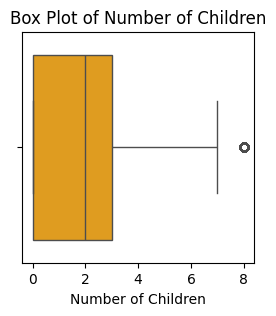

In [125]:
# Box plot showing outlier/distribution of number of childs that the respondents have
plt.figure(figsize=(3, 3))
sns.boxplot(x=df['childs'], color='orange')
plt.title('Box Plot of Number of Children')
plt.xlabel('Number of Children')
plt.show()

<ipython-input-164-f815f611e9fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[var], order=sorted_order, palette='pastel')


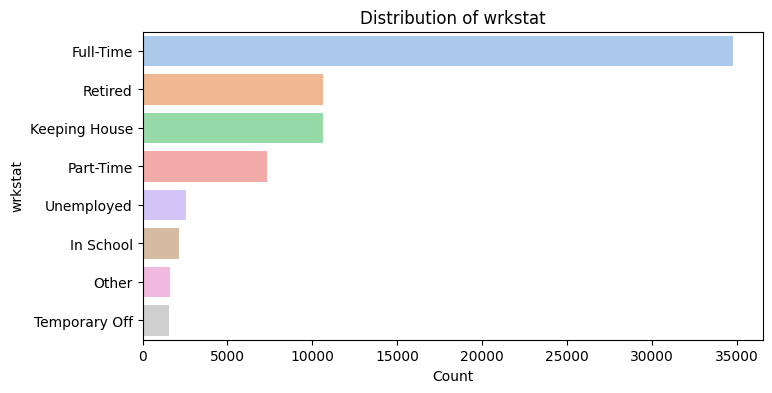

<ipython-input-164-f815f611e9fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[var], order=sorted_order, palette='pastel')


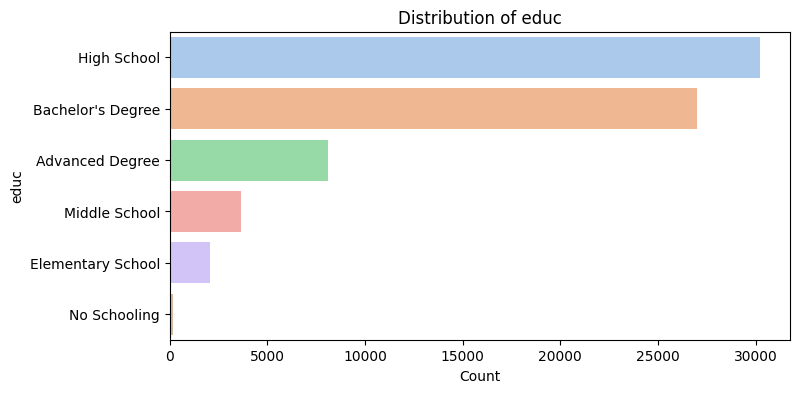

<ipython-input-164-f815f611e9fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[var], order=sorted_order, palette='pastel')


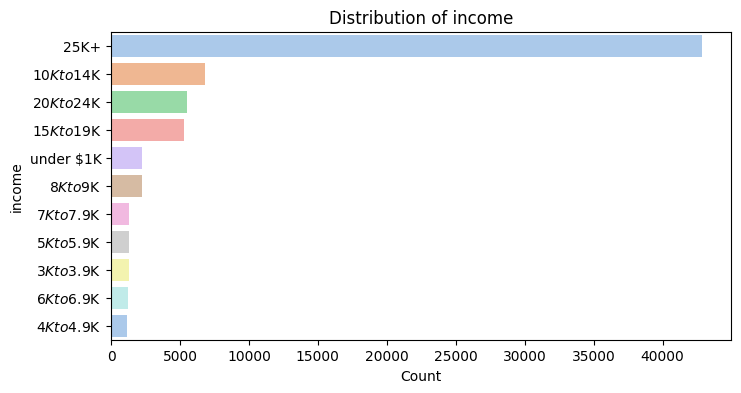

<ipython-input-164-f815f611e9fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[var], order=sorted_order, palette='pastel')


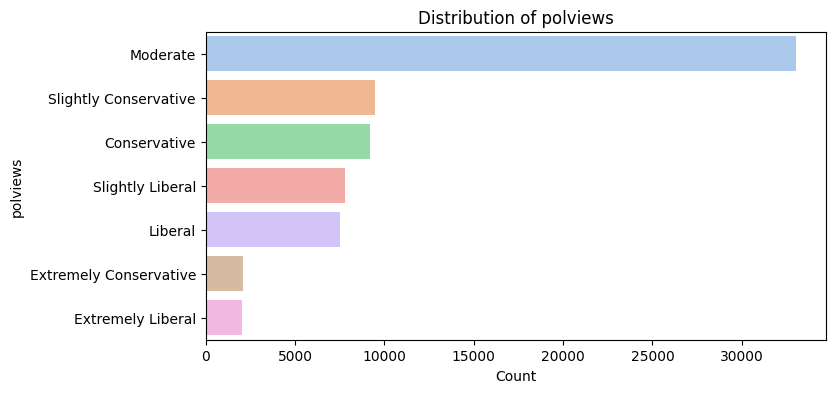

<ipython-input-164-f815f611e9fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[var], order=sorted_order, palette='pastel')


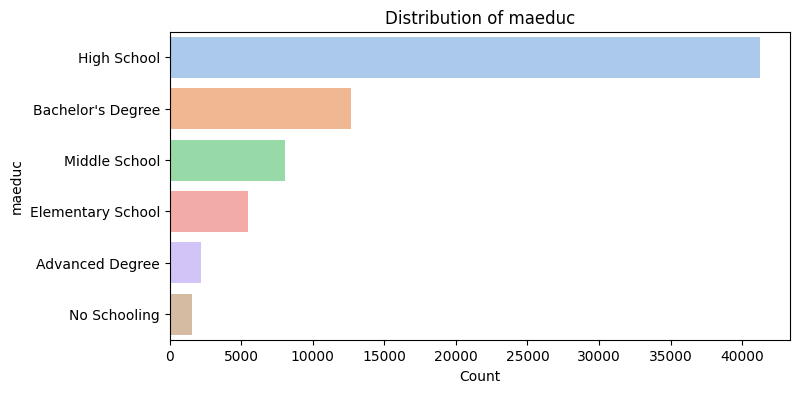

<ipython-input-164-f815f611e9fa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[var], order=sorted_order, palette='pastel')


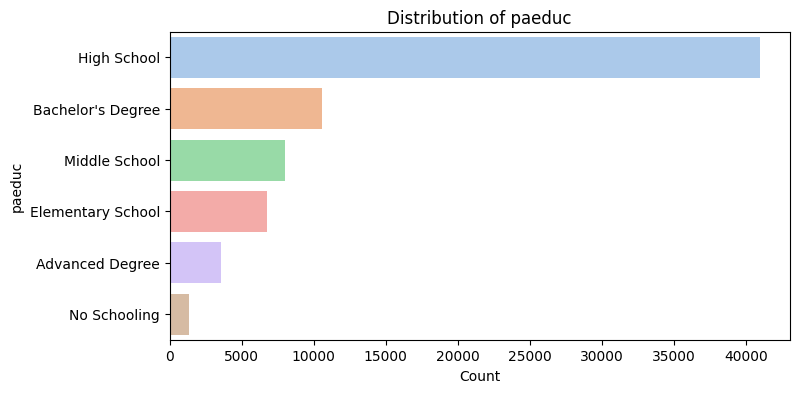

In [164]:
#Bar Graphs for each Categorical Variables
categorical_vars = ['wrkstat', 'educ', 'income', 'polviews', 'maeduc', 'paeduc']
#USED CHATGTP TO HELP ME ITERATE OVER EACH VARIABLE (MAKING IT FASTER)
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sorted_order = df[var].value_counts().sort_values(ascending=False).index  # Sort in descending order
    sns.countplot(y=df[var], order=sorted_order, palette='pastel')
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)
    plt.show()

Text(0, 0.5, 'Age')

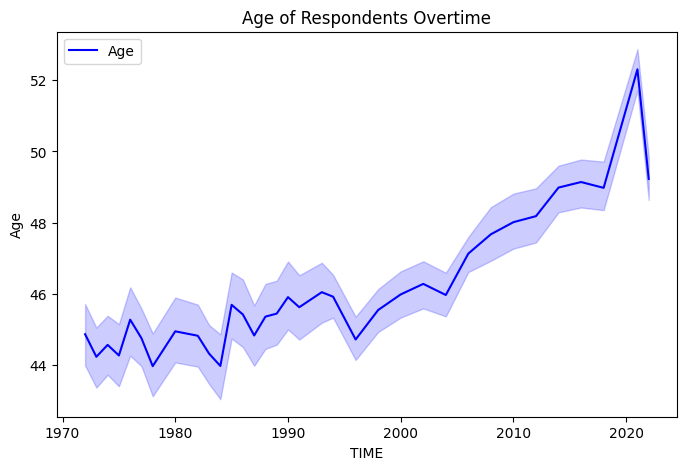

In [140]:
# Line plot of age and number of children
plt.figure(figsize=(8, 5))
sns.lineplot(x=df['year'], y=df['age'], color='blue', label='Age')
plt.title('Age of Respondents Overtime')
plt.xlabel('TIME')
plt.ylabel('Age')

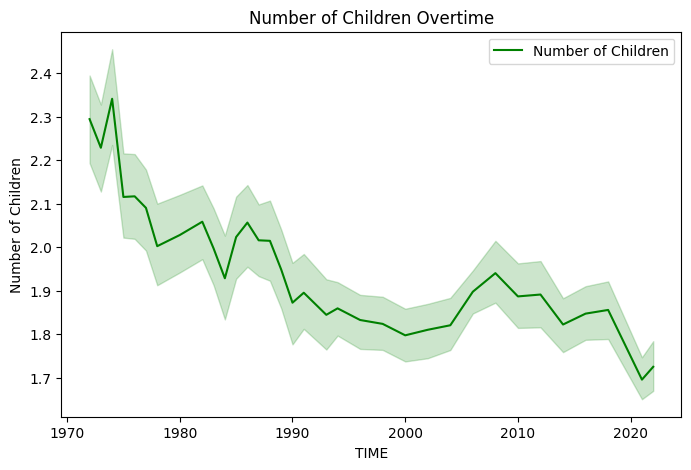

In [141]:
# Line plot of number of children overtime
plt.figure(figsize=(8, 5))
sns.lineplot(x=df['year'], y=df['childs'], color='green', label='Number of Children')
plt.title('Number of Children Overtime')
plt.xlabel('TIME')
plt.ylabel('Number of Children')
plt.show()

Text(0, 0.5, 'Frequency')

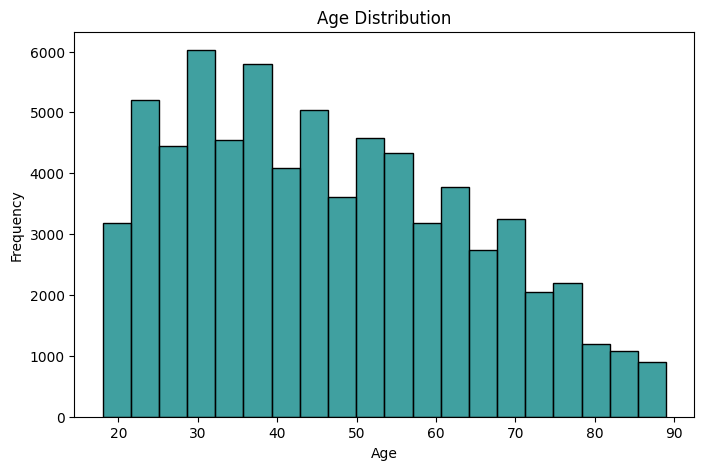

In [145]:
#Age distribution chart
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20,color='teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

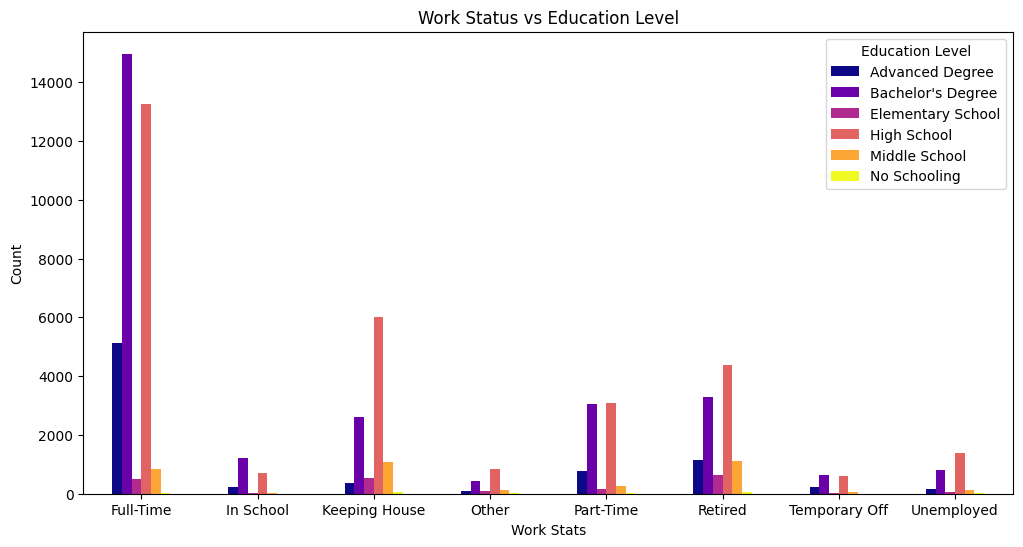

In [160]:
W_E = pd.crosstab(df['wrkstat'], df['educ'])
W_E.plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title("Work Status vs Education Level")
plt.xlabel("Work Stats")
plt.ylabel("Count")
plt.legend(title="Education Level", bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()
